In [25]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sea
import tweepy
import numpy as np
import json
from datetime import datetime
from mpl_toolkits.basemap import Basemap
import os
plotly_key = os.environ["PLOTLY_KEY"]
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.graph_objs import *

In [49]:
mapbox_token = "pk.eyJ1IjoiYW14bW9uZ29vc2UiLCJhIjoiY2plbG1iYml3MXdrYjJxbW80YW53dWE0bCJ9.3VkhNFfkrJISw42FzdDbRA"
plotly.tools.set_credentials_file(username='amxmongoose', api_key=plotly_key)

Data Used:
    1. U.S. census data
    2. County health data
    3. Air quality data
    
Objectives:
    1. Identify relationship between geographic information and health statistics
    2. Determine is there is a correlation between geographic air quality and health quality
    3. Show healthiest/unhealthiest places in the united states both in air quality and health statistics
    

In [50]:
health_data_path = os.path.join('Data Sets', 'health_data', 'SUMMARYMEASURESOFHEALTH.csv')
fields = ['CHSI_County_Name','CHSI_State_Name','ALE','All_Death','Health_Status']
health_df = pd.read_csv(health_data_path, skipinitialspace=True, usecols=fields)
health_df = health_df.rename(columns={'CHSI_County_Name':'County','CHSI_State_Name':'State'})

In [51]:
census_data_path = os.path.join('Data Sets', 'acs2015_county_data.csv')
fields = ['State', 'County', 'TotalPop', 'Income', 'IncomePerCap', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'Unemployment']
census_df = pd.read_csv(census_data_path, skipinitialspace=True, usecols=fields)

In [52]:
merged_df = pd.merge(health_df,census_df,on=['County','State'],how='outer')

In [53]:
air_data_path = os.path.join('Data Sets', 'annual_aqi_by_county_2017.csv')
fields = ['State', 'County', 'Max AQI', 'Median AQI','Unhealthy Days']
air_df = pd.read_csv(air_data_path, skipinitialspace=True, usecols=fields)

In [54]:
merged_df = pd.merge(merged_df,air_df,on=['County','State'],how='outer')
merged_df = merged_df.dropna(subset = ['Max AQI'])

In [55]:
california_df = merged_df.loc[merged_df['State'] == 'California']
california_df = california_df.reset_index(drop=True)

<function matplotlib.pyplot.show>

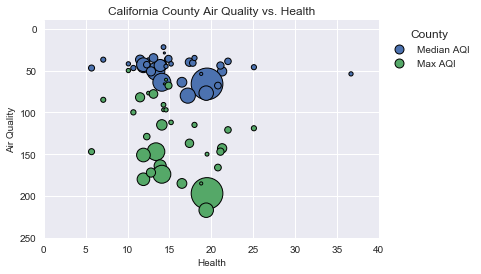

In [56]:
plt.scatter(x=california_df['Health_Status'], 
            y=california_df['Median AQI'],
            edgecolors = 'black',
            s=california_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0)

plt.scatter(x=california_df['Health_Status'], 
            y=california_df['Max AQI'],
            edgecolors = 'black',
            s=california_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0) 

plt.legend(['Median AQI','Max AQI'],
           title=('County'),
           bbox_to_anchor=(1.3,1), 
           fancybox=True, 
           fontsize=10, 
           markerscale=.4)

plt.title('California County Air Quality vs. Health')
plt.xlabel('Health',fontsize=10)
plt.ylabel('Air Quality',fontsize=10)
plt.xlim(0,40)
plt.ylim(250,-10)        
sea.set()

plt.show

<function matplotlib.pyplot.show>

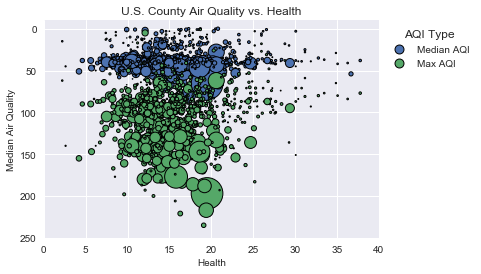

In [57]:
plt.scatter(x=merged_df['Health_Status'], 
            y=merged_df['Median AQI'],
            edgecolors = 'black',
            s=merged_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0)

plt.scatter(x=merged_df['Health_Status'], 
            y=merged_df['Max AQI'],
            edgecolors = 'black',
            s=merged_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0)

plt.legend(['Median AQI','Max AQI'],
           title=('AQI Type'), 
           bbox_to_anchor=(1.3,1), 
           fancybox=True, 
           fontsize=10, 
           markerscale=0.4)

plt.title('U.S. County Air Quality vs. Health')
plt.xlabel('Health',fontsize=10)
plt.ylabel('Median Air Quality',fontsize=10)
plt.xlim(0,40)
plt.ylim(250,-10)        
sea.set()

plt.show

In [58]:
data = Data([
    Scattermapbox(
        lat=['45.5017'],
        lon=['-73.5673'],
        mode='markers',
        marker=Marker(
            size=14
        ),
        text=['Montreal'],
    )
])

layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_token,
        bearing=0,
        center=dict(
            lat=45,
            lon=-73
        ),
        pitch=0,
        zoom=1,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [48]:
fips = ['06021', '06023', '06027',
        '06029', '06033', '06059',
        '06047', '06049', '06051',
        '06055', '06061']
values = range(len(fips))

fig = ff.create_choropleth(fips=fips, values=values)
py.iplot(fig)

In [ ]:
cal_avg_ale = california_df['ALE'].mean()
cal_avg_death = california_df['All_Death'].mean()
cal_avg_health = california_df['Health_Status'].mean()

In [9]:
geo_path = os.path.join('Data Sets', 'uscitiesv1.3.csv')
geo_data = pd.read_csv(geo_path)

# Extract the data we're interested in
lat = geo_data['lat'].values
lon = geo_data['lng'].values
population = geo_data['population'].values
#area = geo_data['area_total_km2'].values

/Users/adammercier/anaconda3/envs/myenvironment/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/adammercier/anaconda3/envs/myenvironment/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/adammercier/anaconda3/envs/myenvironment/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/adammercier/anaconda3/envs/myenvironment/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/adammercier/anaconda3/envs/myenvironment/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecatio

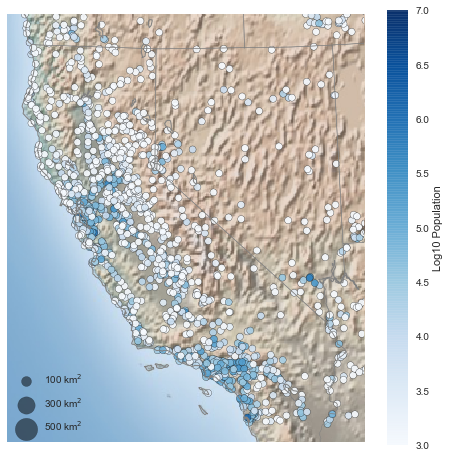

In [23]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))

m = Basemap(projection='lcc', 
            resolution='i', 
            lat_0=37.5, 
            lon_0=-119,
            width=1E6, 
            height=1.2E6)

m.shadedrelief()
m.drawcoastlines(color='gray')
#m.drawcounties()
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, 
          lat, 
          latlon=True,
          c=np.log10(population),
          cmap='Blues', 
          alpha=0.9,
          edgecolors = 'black')
# s=area,
# 3. create colorbar and legend
plt.colorbar(label=r'Log10 Population')
plt.clim(3, 7)

# make legend with reference points
for a in [100, 300, 500]:
    plt.scatter([], 
                [], 
                c='k', 
                alpha=0.5, 
                s=a,
                label=str(a) + ' km$^2$')
    
plt.legend(scatterpoints=1, 
           frameon=False,
           labelspacing=1, 
           loc='lower left')